<a href="https://colab.research.google.com/github/santilema/data-sc_course/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tercera entrega: Proyecto Final

Nombre y apellido del estudiante: Santiago Lema

## Introducción y preparación de datos

Esta investigación de caracter educativo tendrá como objetivo final: desarrollar un modelo predictivo que, dada la descripción de una imagen de un tumor mamario, pueda analizar sus características y diagnosticar si se trata de un tumor benigno o uno maligno.

Referencia del set de datos:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('breast_cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este data set tiene 569 filas, y 33 columnas


El dataset corresponde a un listado de pacientes cuyos tumores fueron escandeados. La primera columna corresponde al id de cada paciente. La segunda será nuestra variable target, donde "B" nos indicará si el tumor es benigno, y "M" si es maligno. las siguientes 10 columnas son promedios de distintos atributos medidos en cada tumor (e.g. sus radios, texturas, áreas, perímetros, etc.). Este análisis se concentrará en estas 12 primeras columnas (los valores medios) para estudiar el set de dato, dejando de lado por ahora los valores de error estándar y máximos. Para ello, redefinimos nuestro data frame de la siguiente manera:

In [ ]:
to_drop = []

for i in df.columns:
  if i not in df.columns[0:12]:
    to_drop.append(i)
df = df.drop(columns = to_drop)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
print('Ahora, el data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Ahora, el data set tiene 569 filas, y 12 columnas


Y las siguientes son las variables que estaremos estudiando:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


El data set no presenta valores missing.

## Análisis estadístico Básico

In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.0,125020586.0,8670.0,869218.0,906024.0,8813129.0,911320502.0
radius_mean,569.0,14.0,4.0,7.0,12.0,13.0,16.0,28.0
texture_mean,569.0,19.0,4.0,10.0,16.0,19.0,22.0,39.0
perimeter_mean,569.0,92.0,24.0,44.0,75.0,86.0,104.0,188.0
area_mean,569.0,655.0,352.0,144.0,420.0,551.0,783.0,2501.0
smoothness_mean,569.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
compactness_mean,569.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
concavity_mean,569.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
concave points_mean,569.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
symmetry_mean,569.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col = df.columns.values

for i in col[2:]:
    print('Medidas de: ', i)
    print(df[str(i)].describe())
    print('---')
    

Medidas de:  radius_mean
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64
---
Medidas de:  texture_mean
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64
---
Medidas de:  perimeter_mean
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64
---
Medidas de:  area_mean
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64
---
Medidas de:  smoothness_mean
count    569.000000
mean       0.096360
std        0.014064
min    

## Análisis univariado

Un análisis univariado de las variables que describen características de los tumores (que son todas las de tipo float) nos va a dar una noción visual de la distribución independiente de nuestras variables.

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [ ]:
var_float = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

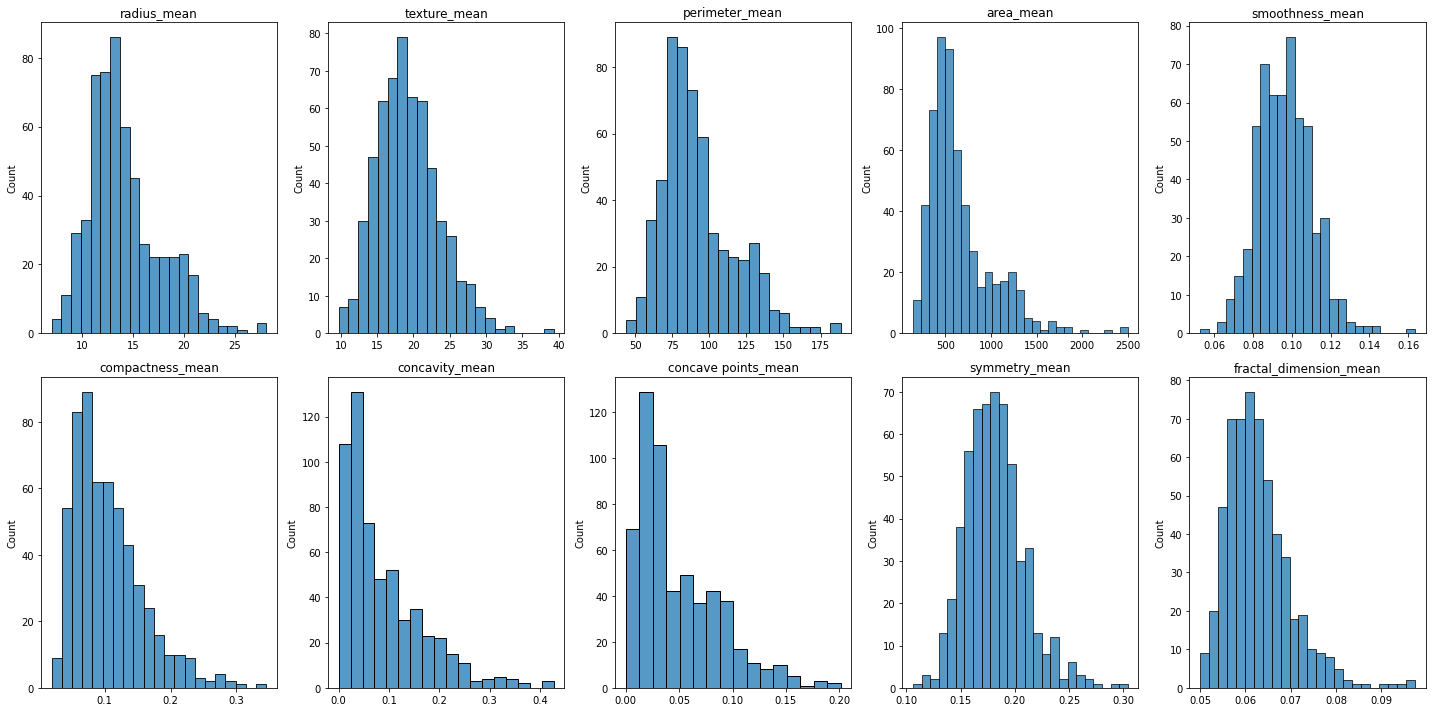

In [ ]:
fig, axes = plt.subplots(len(var_float)//5,
                         5,
                         figsize = (20,10))

for n, m in enumerate(var_float):
    i = n // 5
    j = n % 5
    sns.histplot(df[m], ax = axes[i][j])
    axes[i][j].set_title(m)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

Podemos observar que, algunas más acentuadas que otras, todas las variables presentan asimetrías positivas. También podemos ver que algunas variables poseen varios valores extremos (por ejemplo: area_mean y fractal_dimension_mean). Esto puede visualizarse mejor en los siguientes boxplots.

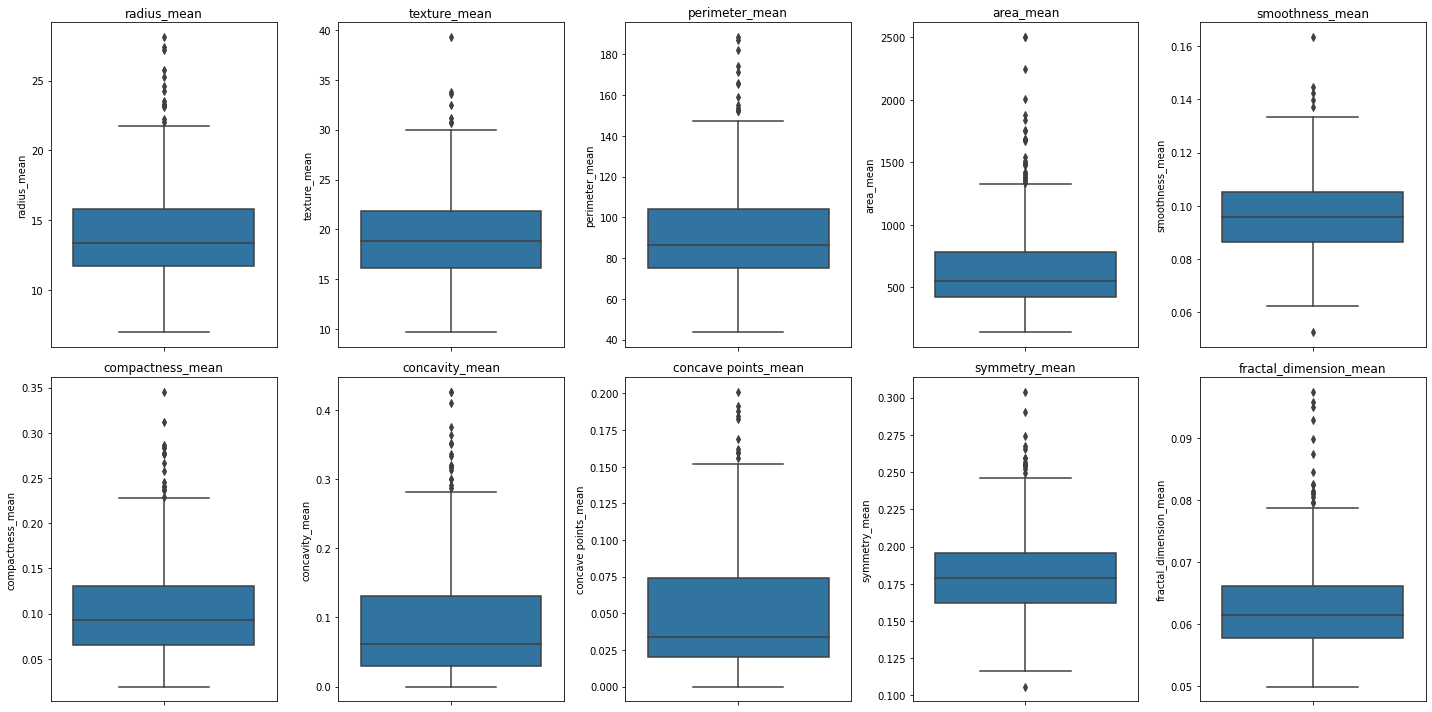

In [ ]:
fig, axes = plt.subplots(len(var_float)//5, 5,
                         figsize=(20,10))

for n, m in enumerate(var_float):
    i = n // 5
    j = n % 5
    sns.boxplot(y = df[m],
                data = df,
                ax = axes[i][j])
    axes[i][j].set_title(m)
    
plt.tight_layout()

Como último análisis univariado, estudiaremos de manera independiente la variable target:

In [ ]:
df['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [ ]:
dgn = df['diagnosis'].groupby(df.diagnosis).count()
prop = dgn.values / sum(dgn.values)
perc_series = pd.Series(data = prop, index = dgn.index)

pd.DataFrame({'total':dgn,
              'percentage':prop})

,total,percentage
diagnosis,,
B,357,0.627417
M,212,0.372583


([<matplotlib.patches.Wedge at 0x7f834f4ac340>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'B'),
  Text(0.428654605109445, -1.013042560566172, 'M')],
 [Text(-0.23381165452218156, 0.5525686475087055, '63%'),
  Text(0.23381160278696997, -0.55256866939973, '37%')])

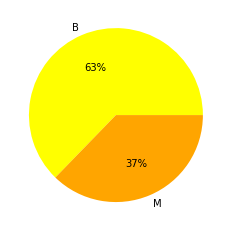

In [ ]:
plt.pie(dgn,
        labels = dgn.index,
        colors = ('yellow', 'orange'), 
        autopct = '%1.0f%%')

  ## Análisis bivariado

De una selección de las variables anteriores, realizaremos un análisis bivariado para estudiar sus distribuciones discriminadas según nuestro target.

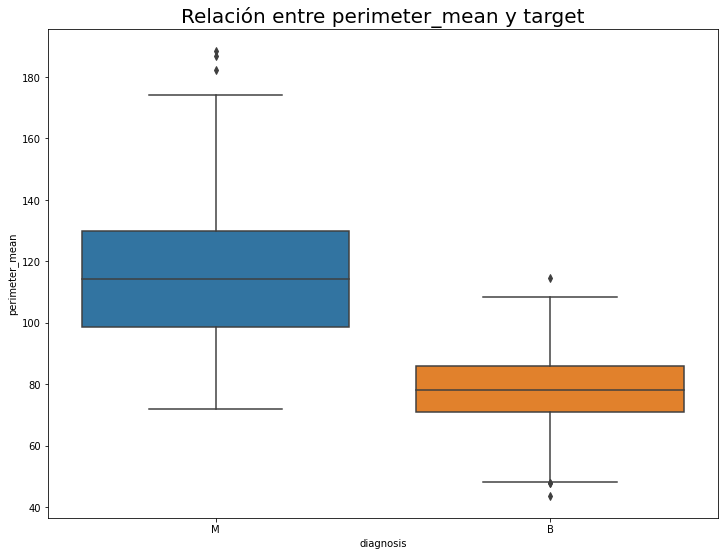

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x = df['diagnosis'],
            y =  df['perimeter_mean'])

plt.title('Relación entre perimeter_mean y target', fontsize = 20)

plt.show()

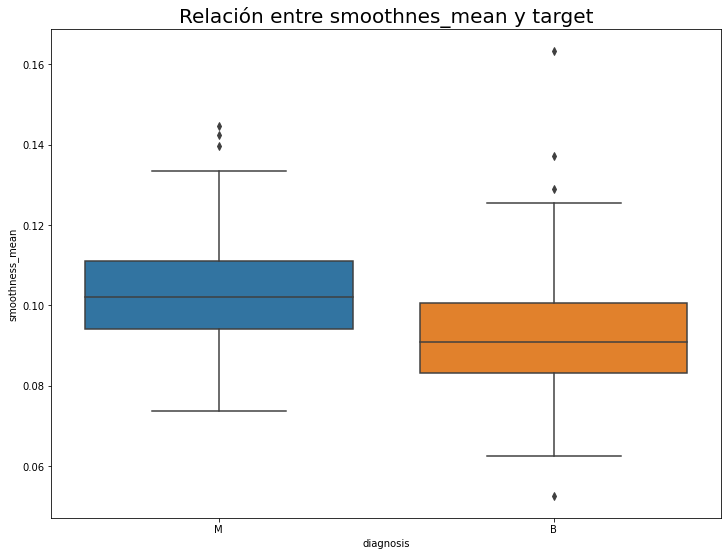

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x = df['diagnosis'],
            y =  df['smoothness_mean'])

plt.title('Relación entre smoothnes_mean y target', fontsize = 20)

plt.show()

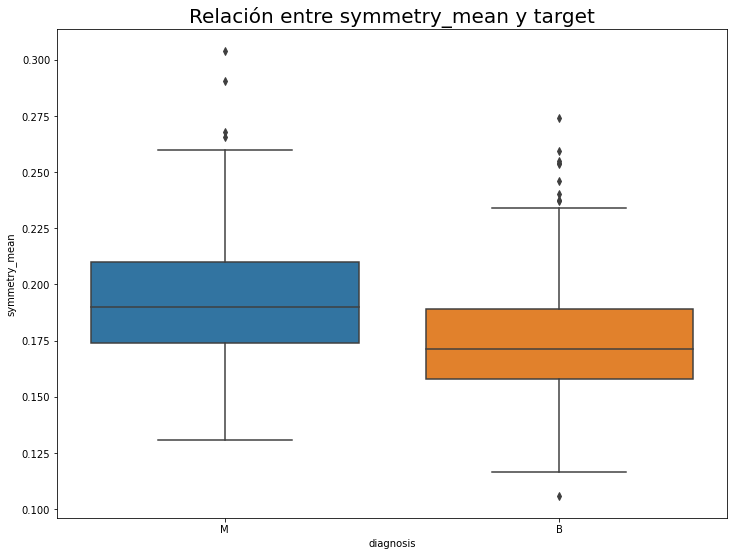

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x = df['diagnosis'],
            y = df['symmetry_mean'])

plt.title('Relación entre symmetry_mean y target', fontsize = 20)

plt.show()

Es evidente que, en mayor o menor medida. todas estas variables tienden a acumularse en valores más bajos cuando los tumores son benignos.

## Análisis multivariado

Correlación entre las variables:

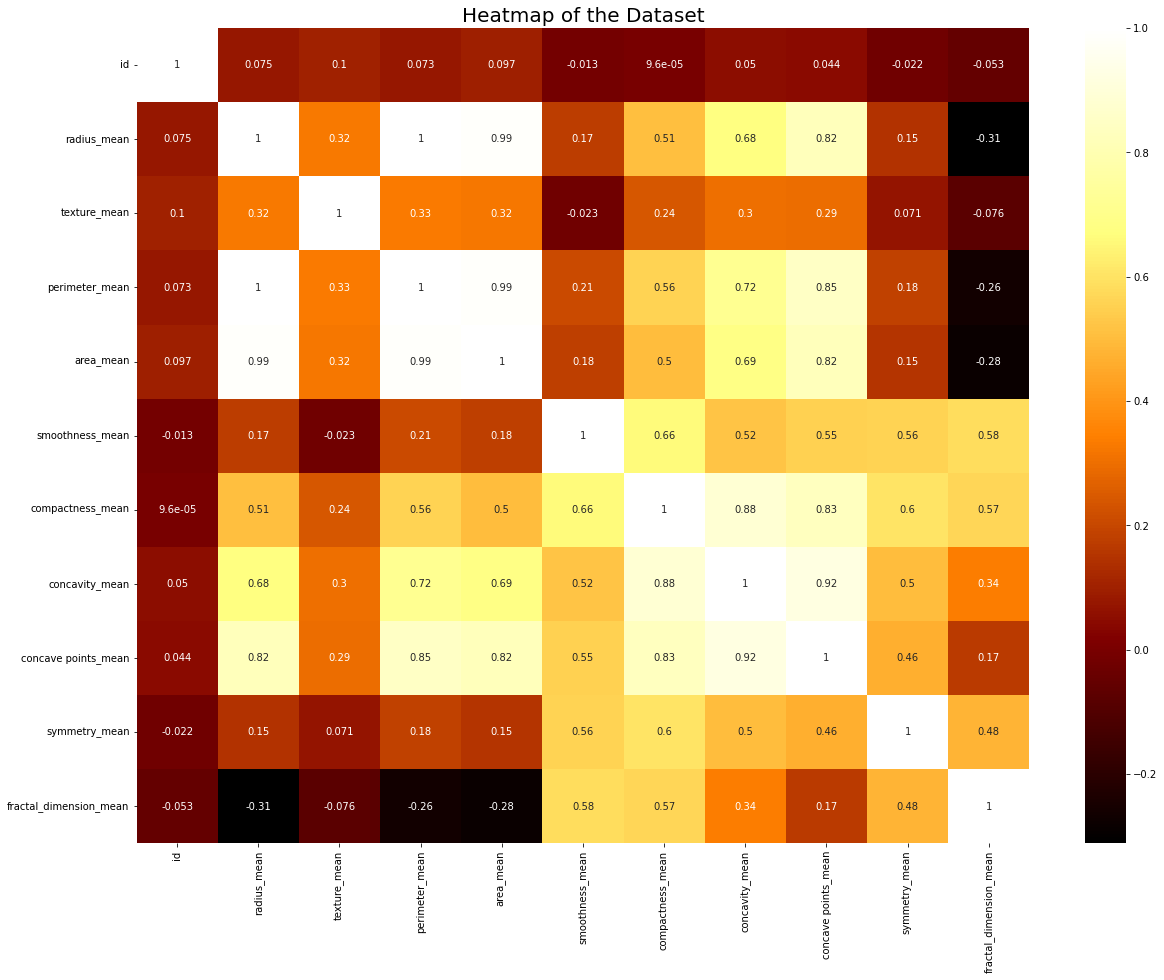

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(),
            annot = True,
            cmap = 'afmhot')
plt.title('Heatmap of the Dataset', fontsize = 20)

plt.show()

Análisis gráfico de correlaciones de las variables (Pairplot):

<Figure size 1440x1080 with 0 Axes>

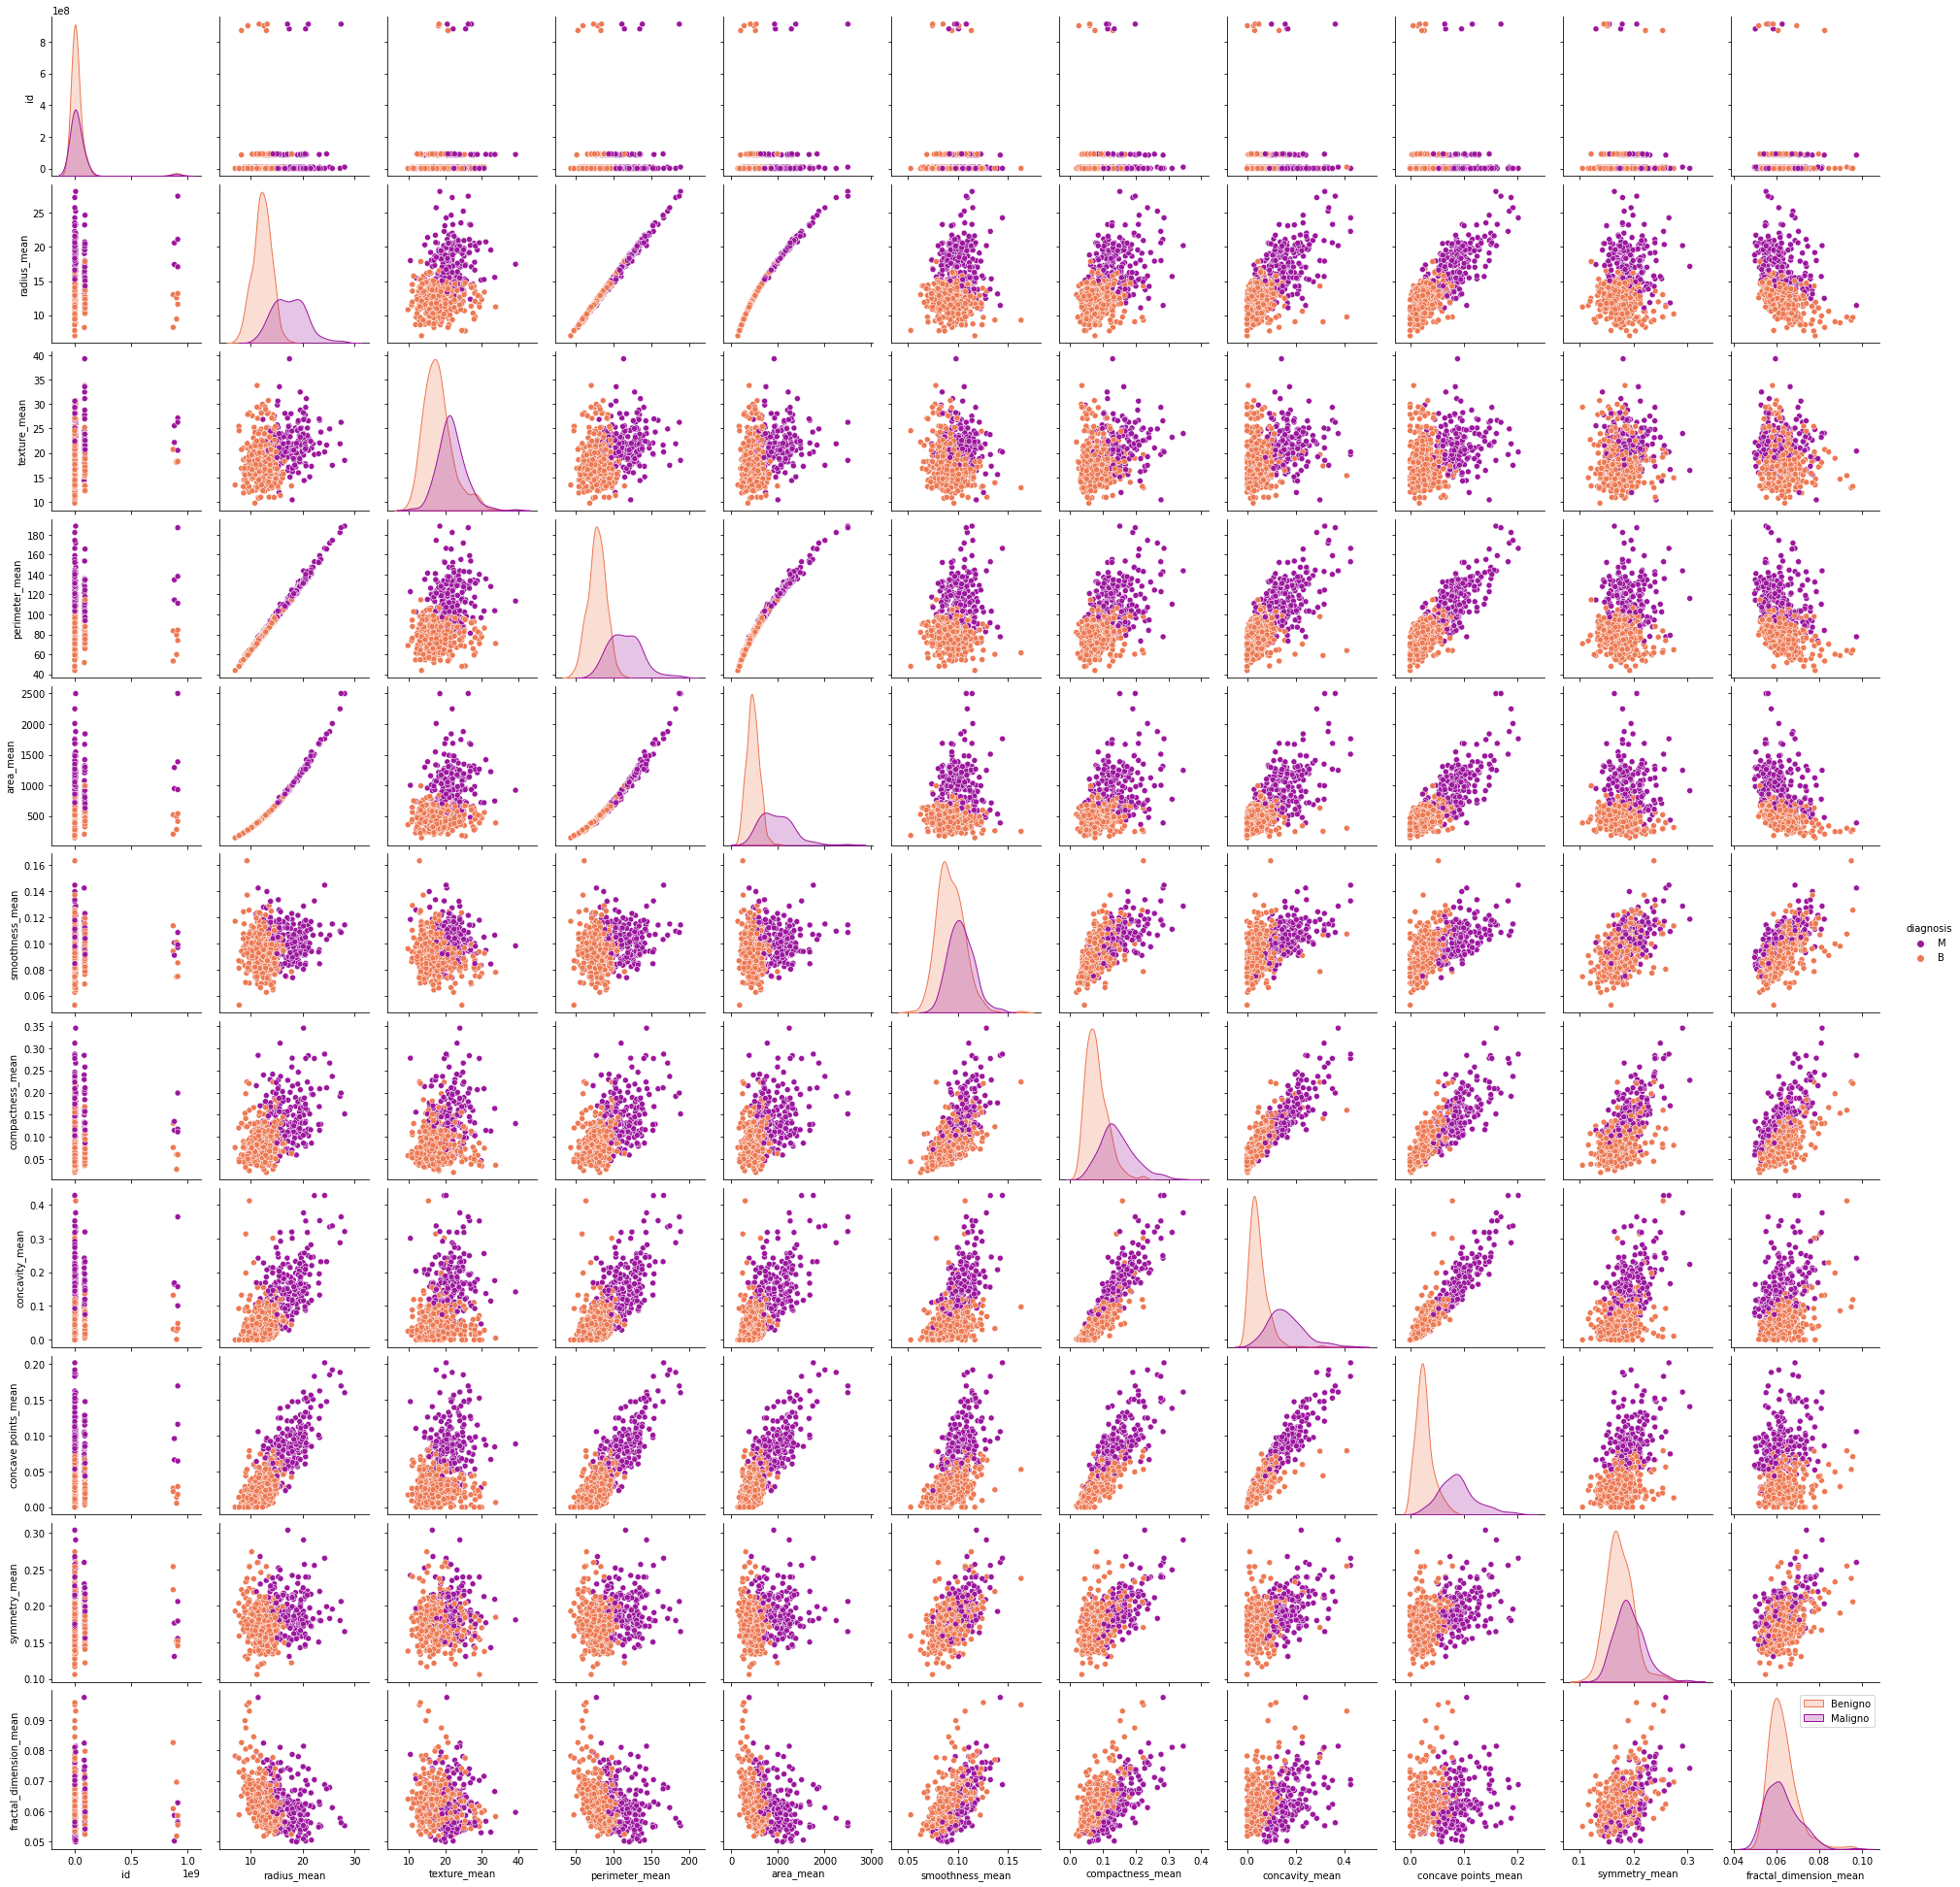

In [ ]:
plt.figure()
sns.pairplot(df, 
             hue = 'diagnosis',
             palette = 'plasma')
plt.legend(['Benigno', 'Maligno'])

plt.show()

Una información evidente que salta a la vista mirando estos gráficos es que: para toda variable relacionada al tamaño del tumor, los diagnósticos benignos tienden a encontrarse entre los valores más bajos.

Más detalladamente, visualizamos las 3 variables vistas en el análisis bivariado para ver como se comportan en relación a las demás.

Joint plot de perimeter_mean con otras variables ==> 

Correlación perimeter_mean y radius_mean ==>  0.9978552814938109
Correlación perimeter_mean y texture_mean ==>  0.3295330586865707
Correlación perimeter_mean y area_mean ==>  0.9865068039913907
Correlación perimeter_mean y smoothness_mean ==>  0.2072781636910072
Correlación perimeter_mean y compactness_mean ==>  0.556936210879562
Correlación perimeter_mean y concavity_mean ==>  0.7161356501174047
Correlación perimeter_mean y concave points_mean ==>  0.8509770412528191
Correlación perimeter_mean y symmetry_mean ==>  0.18302721211685316
Correlación perimeter_mean y fractal_dimension_mean ==>  -0.26147690806633256


<Figure size 1440x1080 with 0 Axes>

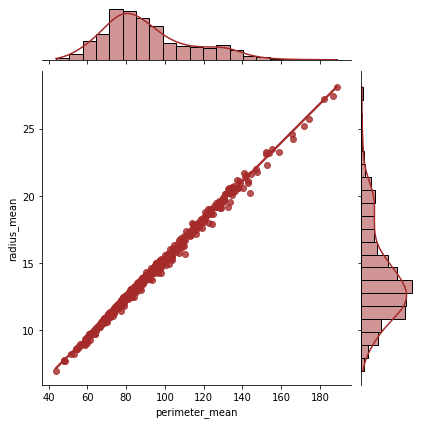

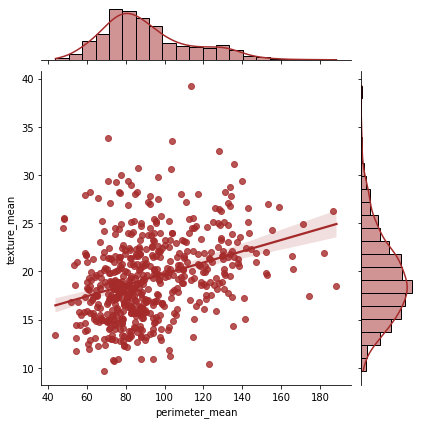

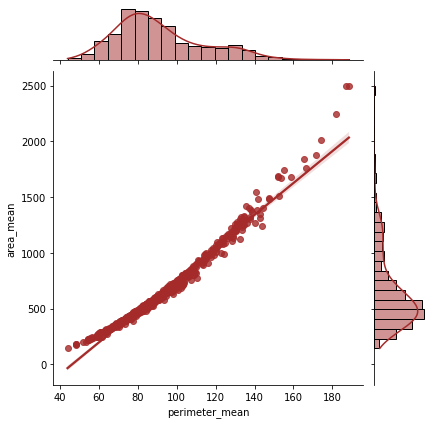

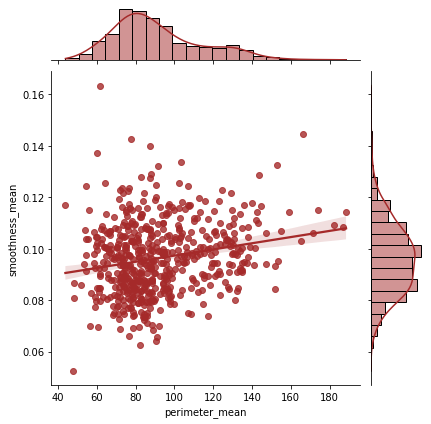

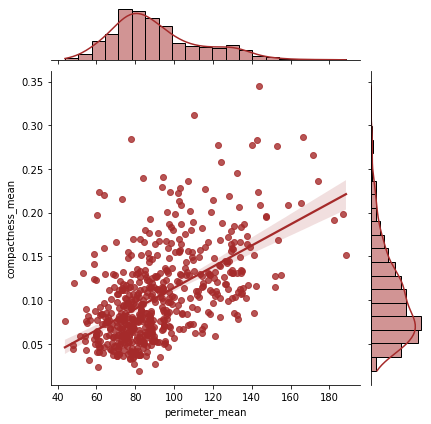

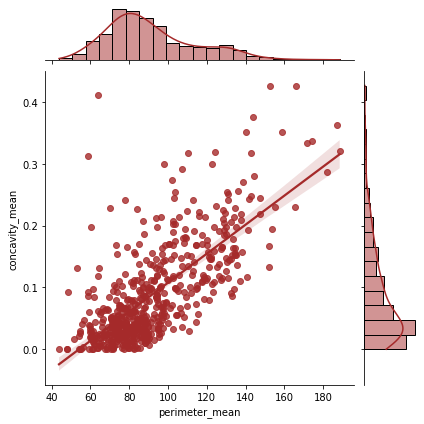

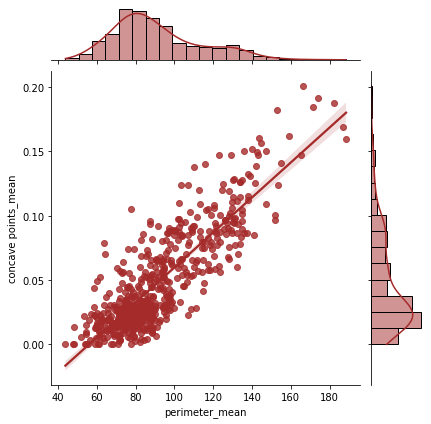

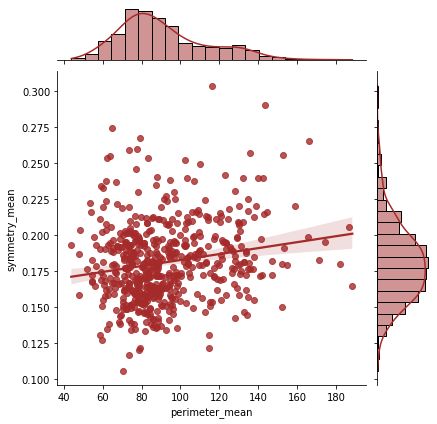

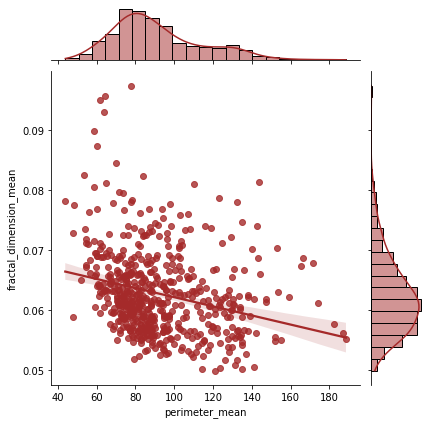

In [ ]:
plt.figure()
print("Joint plot de perimeter_mean con otras variables ==> \n")
for i in df.columns:
    if i != 'perimeter_mean' and i != 'diagnosis' and i != 'id':
      print(f"Correlación perimeter_mean y {i} ==> ", df.corr().loc['perimeter_mean'][i])
      sns.jointplot(x = 'perimeter_mean',
                    y = i,
                    data = df,
                    kind = 'reg',
                    color = 'brown')
        
plt.show()

La variable perimeter_mean se relaciona con las otras variables en una asociación lineal positiva. Con excepción de la relación que tiene con la variable fractal_dimension_mean que resulta una asociación lineal negativa.

Joint plot de smoothness_mean' con otras variables ==> 

Correlación 'smoothness_mean' y radius_mean ==>  0.17058118749299467
Correlación 'smoothness_mean' y texture_mean ==>  -0.023388515998423325
Correlación 'smoothness_mean' y perimeter_mean ==>  0.2072781636910072
Correlación 'smoothness_mean' y area_mean ==>  0.1770283772540016
Correlación 'smoothness_mean' y compactness_mean ==>  0.6591232152159234
Correlación 'smoothness_mean' y concavity_mean ==>  0.52198376771426
Correlación 'smoothness_mean' y concave points_mean ==>  0.5536951727437609
Correlación 'smoothness_mean' y symmetry_mean ==>  0.5577747880728878
Correlación 'smoothness_mean' y fractal_dimension_mean ==>  0.5847920019499775


<Figure size 1440x1080 with 0 Axes>

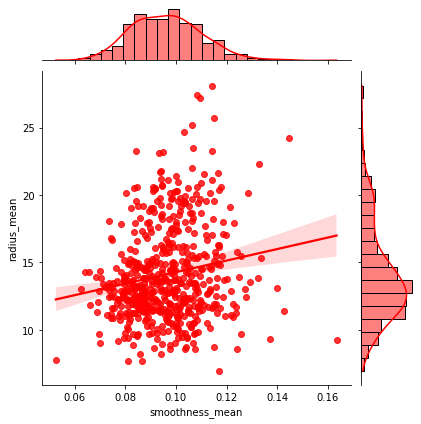

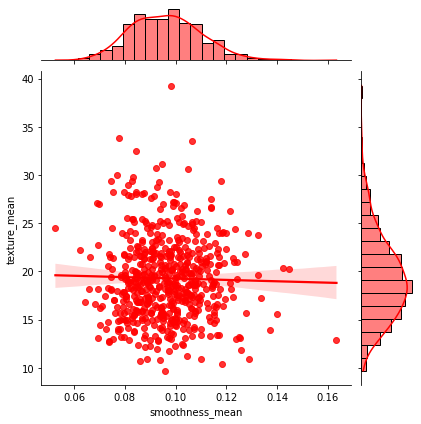

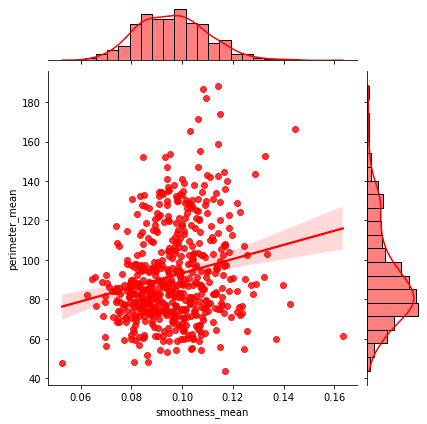

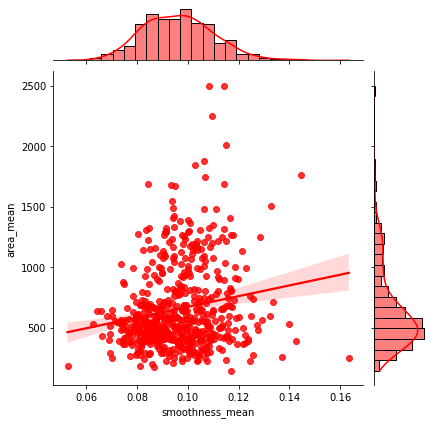

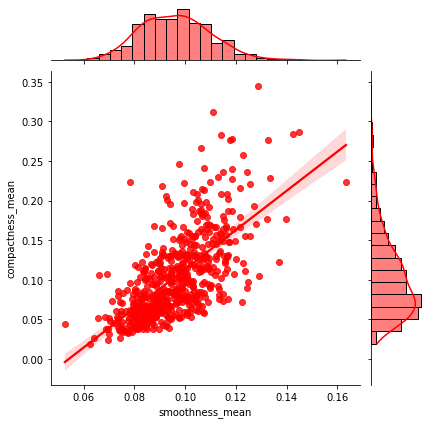

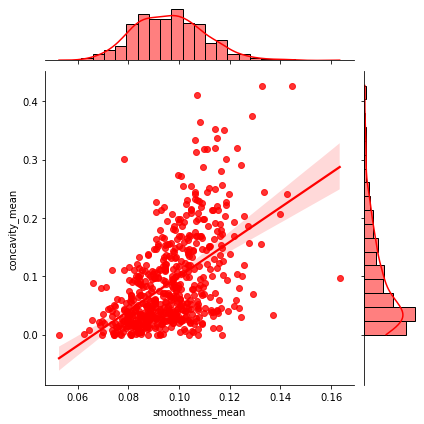

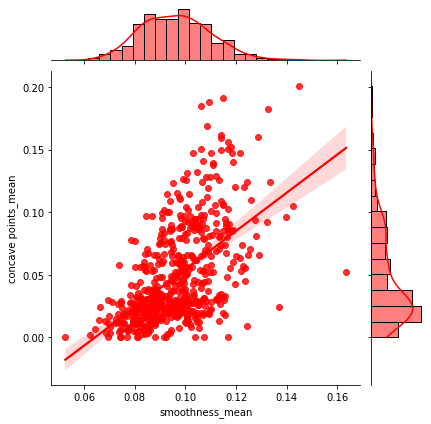

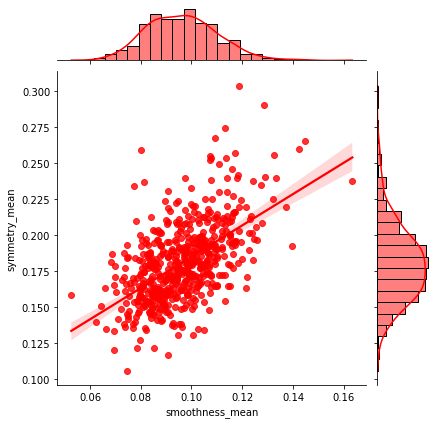

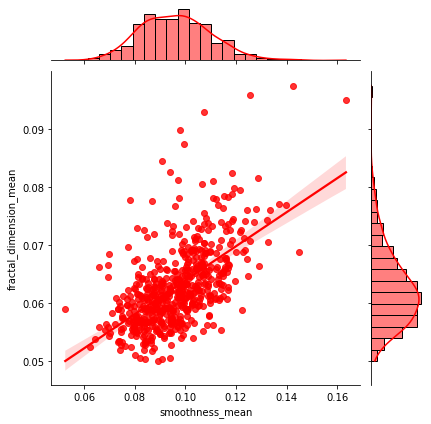

In [ ]:
plt.figure()
print("Joint plot de smoothness_mean' con otras variables ==> \n")
for i in df.columns:
    if i != 'smoothness_mean' and i != 'diagnosis' and i != 'id':
      print(f"Correlación 'smoothness_mean' y {i} ==> ", df.corr().loc['smoothness_mean'][i])
      sns.jointplot(x = 'smoothness_mean',
                    y = i,
                    data = df,
                    kind = 'reg',
                    color = 'red')
        
plt.show()

Joint plot de symmetry_mean' con otras variables ==> 

Correlación 'symmetry_mean' y radius_mean ==>  0.14774124199260202
Correlación 'symmetry_mean' y texture_mean ==>  0.07140098048331764
Correlación 'symmetry_mean' y perimeter_mean ==>  0.18302721211685316
Correlación 'symmetry_mean' y area_mean ==>  0.15129307903511224
Correlación 'symmetry_mean' y smoothness_mean ==>  0.5577747880728878
Correlación 'symmetry_mean' y compactness_mean ==>  0.6026410484055158
Correlación 'symmetry_mean' y concavity_mean ==>  0.5006666171419609
Correlación 'symmetry_mean' y concave points_mean ==>  0.4624973883673585
Correlación 'symmetry_mean' y fractal_dimension_mean ==>  0.47992133005096926


<Figure size 1440x1080 with 0 Axes>

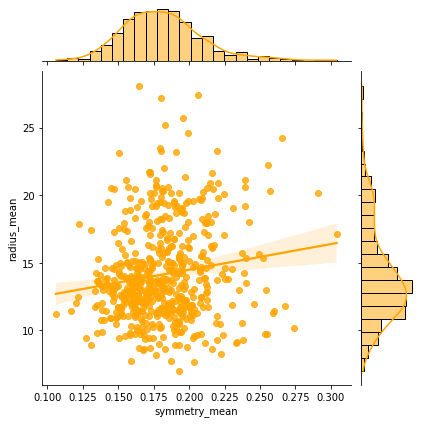

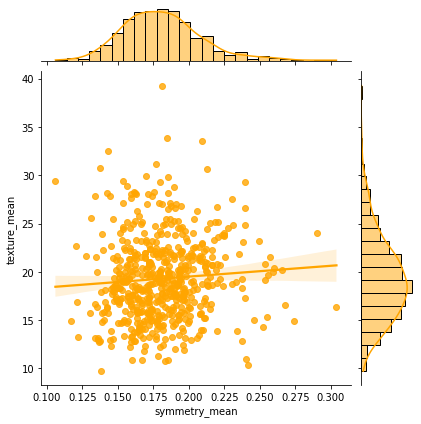

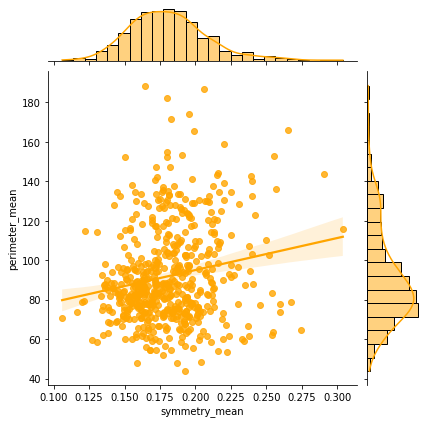

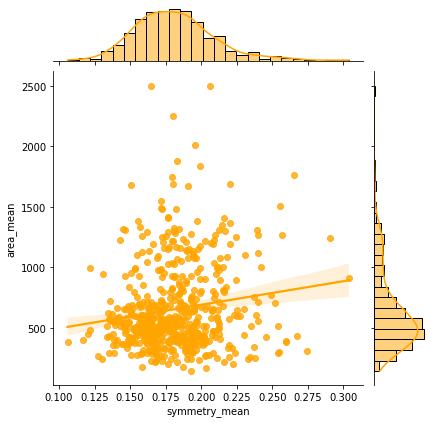

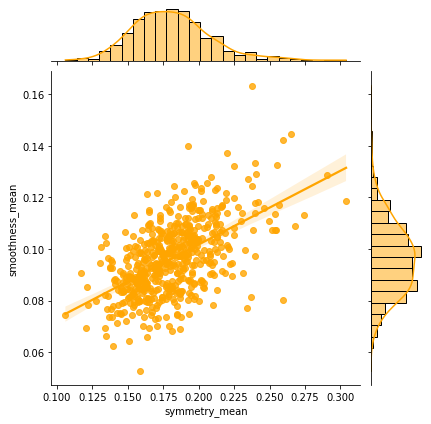

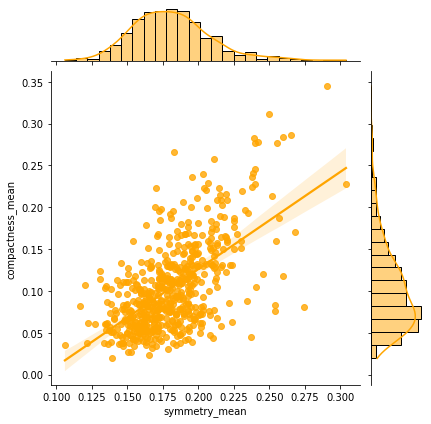

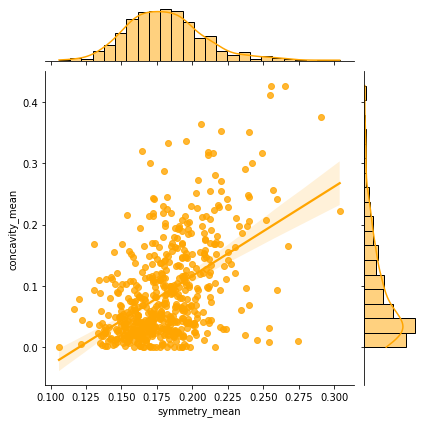

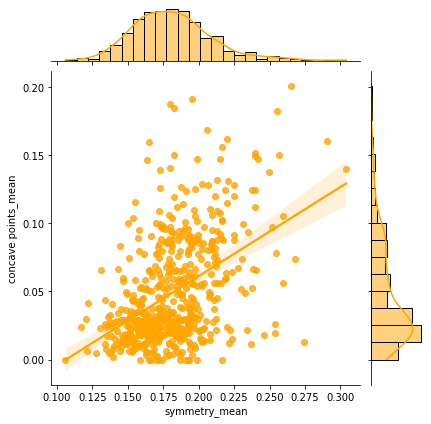

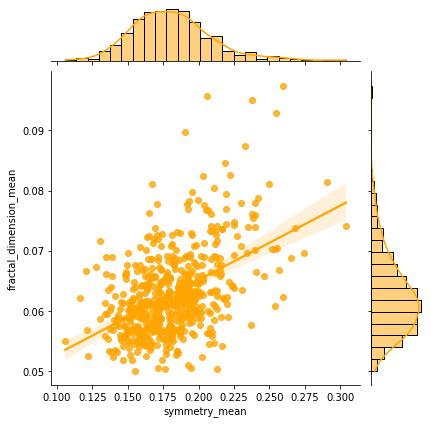

In [ ]:
plt.figure()
print("Joint plot de symmetry_mean' con otras variables ==> \n")
for i in df.columns:
    if i != 'symmetry_mean' and i != 'diagnosis' and i != 'id':
      print(f"Correlación 'symmetry_mean' y {i} ==> ", df.corr().loc['symmetry_mean'][i])
      sns.jointplot(x = 'symmetry_mean',
                    y = i,
                    data = df,
                    kind = 'reg',
                    color = 'orange')
        
plt.show()

Resulta interesante y no tan intuitivo de este último análisis de gráficos ver una asociación lineal positiva bastante fuerte entre las variables symmetry_mean y smoothness_mean.

## Modelo de clasificación

El modelo de clasificación constará principalmente de un algoritmo de RandomForest que evaluará 200 árboles de decisión paralelamente. La accuracy del algoritmo será evaluada para obtener información acerca del rendimiento del mismo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV #Para determinar cantidad de arboles y features

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'B': 1, 'M': 0})

In [ ]:
x = df.drop('diagnosis', axis = 1) #Elimino variable target
y = df.diagnosis

Separo el dataset para entrenarlo.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    stratify = y,
                                                    test_size = 0.30, 
                                                    random_state = 8)

In [ ]:
#Creo un random forest
ran_forest = RandomForestClassifier(random_state = 8,
                               n_estimators = 200,
                               class_weight = "balanced",
                               max_features = "log2")

ran_forest.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=8)

In [ ]:
y_test_pred = ran_forest.predict(x_test)

In [ ]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9532163742690059


El modelo predice con una precisión de más de 0.95